# 6.5 Unsupervised Machine Learning: Clustering

### This script contains the following:

#### 1. Importing libraries and datns
#### 2. The elbow technique
#### 3. k-means clustering

## 01. Importing Libraries and Data

In [1]:
# Iport Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [7]:
%matplotlib inline

In [3]:
# Importing Data
# Create path
path = r'C:\Users\Dell\Documents\IBM Watson Marketing Customer Value Data'

In [4]:
# import customer_value dataset
df = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'customer_value_new.pkl'))

In [5]:
df.columns

Index(['Customer Id', 'State', 'Customer Lifetime Value', 'Response',
       'Coverage', 'Policy Expiry Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
df.dtypes

Customer Id                       object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Policy Expiry Date                object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

## 02. The elbow technique

In [10]:
df=df.select_dtypes(include=['int64','float64'])

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_k

[-8861158707035.242,
 -2578191785563.418,
 -1356725413991.9695,
 -866412759008.1334,
 -690181878759.7125,
 -578675673791.1958,
 -489592266761.67645,
 -423063617731.5703,
 -365807154205.58734]

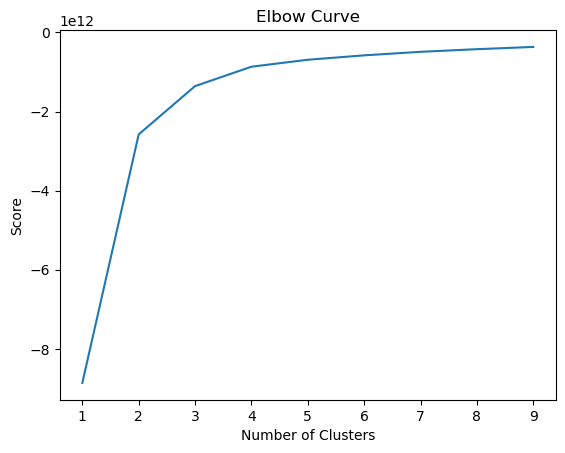

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### In the elbow curve, there's a significant increase in the curve's slope as we move from two to three clusters, and then from three to four clusters on the x-axis. However, beyond four clusters, the curve tends to flatten out. This suggests that the optimal number of clusters for your data is four.

## 03. k-means clustering

In [14]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4) 

In [15]:
# Fit the k-means object to the data.
kmeans.fit(df)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [16]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
df.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'clusters'],
      dtype='object')

In [17]:
df['clusters'].value_counts()

clusters
3    2752
1    2554
0    2095
2    1733
Name: count, dtype: int64

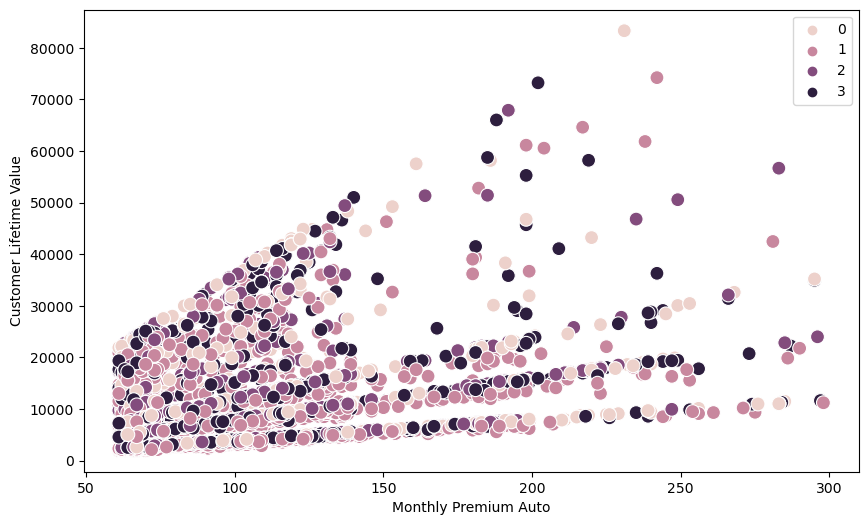

In [22]:
# Plot the clusters for the 'Customer Lifetime Value'and 'Monthly Premium Auto' variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['Monthly Premium Auto'], y=df['Customer Lifetime Value'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Monthly Premium Auto') # Label x-axis.
plt.ylabel('Customer Lifetime Value') # Label y-axis.
plt.show()

#### We observe a clear trend where an increase in Monthly Premium correlates with a rise in Customer Lifetime Value. This suggests that as customers pay higher monthly premiums, their lifetime value also tends to increase. Clusters with higher Customer Lifetime Values, possibly clusters 1 and 2, could benefit from intensified customer retention strategies and loyalty programs.
#### The distribution of data points within each cluster may indicate variability in risk or other influential factors within those customer segments. Understanding these patterns could help fine-tune pricing strategies to align better with the perceived risk or potential value associated with each segment.

In [23]:
# Plot the clusters for the 'Customer Lifetime Value' and 'Monthly Premium Auto'  variables where ' Number of Open coplaints' is 0 or 1
df=df[df['Number of Open Complaints'].isin([0, 1])]

In [26]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4) 

In [27]:
# Fit the k-means object to the data.
kmeans.fit(df)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [28]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


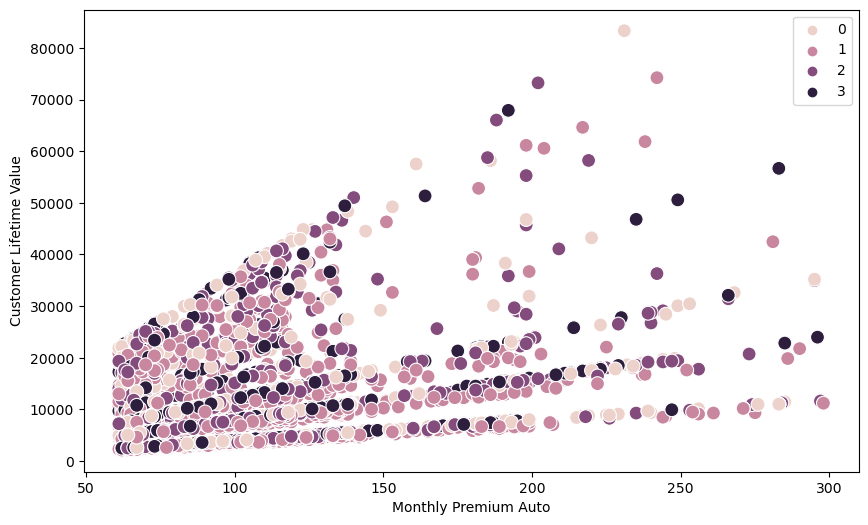

In [30]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['Monthly Premium Auto'], y=df['Customer Lifetime Value'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Monthly Premium Auto') # Label x-axis.
plt.ylabel('Customer Lifetime Value') # Label y-axis.
plt.show()

#### The density of data points within certain clusters may vary slightly. A decrease in data points within some clusters might suggest that customers in those clusters tend to have different complaint levels not considered in the analysis (e.g., 1 or more complaints). Despite potential changes in the number of data points, the characteristics related to Customer Lifetime Value and Monthly Premium in each cluster might remain consistent.#### 
However, examining the distribution within these clusters could offer insights into how complaint status influences a customer's financial engagement with the company. It's possible that customers with no complaints or a moderate number of complaints (e.g., 1 complaint) exhibit specific trends in terms of their Lifetime Value and premium payment."

In [33]:
cluster_stats = df.groupby('clusters')[['Monthly Premium Auto', 'Customer Lifetime Value']].describe()


In [34]:
print(cluster_stats)

         Monthly Premium Auto                                                 \
                        count       mean        std   min   25%   50%    75%   
clusters                                                                       
0                      1893.0  95.232435  37.573830  61.0  69.0  84.0  110.0   
1                      2299.0  94.397129  34.104945  61.0  69.0  84.0  111.0   
2                      2520.0  92.287302  33.784561  61.0  68.0  82.5  108.0   
3                      1551.0  91.099936  32.075149  61.0  68.0  79.0  107.5   

                Customer Lifetime Value                            \
            max                   count         mean          std   
clusters                                                            
0         295.0                  1893.0  8262.908888  7023.038385   
1         298.0                  2299.0  7823.340066  6711.550452   
2         297.0                  2520.0  8161.601176  7115.141858   
3         296.0          

### The abovee displays statistical summaries of customer data divided into four clusters, emphasizing two primary metrics: Monthly Premium Auto and Customer Lifetime Value. These statistics hold significant value for various future steps in an analytics pipeline, particularly in customer segmentation, personalized marketing, risk management, and resource allocation. Disparities in mean, standard deviation, and percentile values among clusters for both Monthly Premium Auto and Customer Lifetime Value suggest diverse customer profiles, which can be further examined to customize specific products or services. Clusters with higher average Monthly Premiums or Customer Lifetime Values may be targeted with premium product offerings or loyalty programs, while those with lower values may respond better to cost-effective solutions or discounts. The variability within clusters, indicated by standard deviation and range (from minimum to maximum), can inform risk assessment and management strategies. Clusters with higher variability might necessitate more meticulous analysis and monitoring to effectively manage potential risks. Resources can be allocated more efficiently by prioritizing customer service efforts on clusters with higher lifetime values or greater profitability, ensuring that high-value customers receive adequate support and attention. Monitoring these clusters over time aids in tracking performance and identifying areas for improvement. Changes in cluster statistics can signal shifts in customer behavior or market conditions, prompting timely adjustments in business strategies.






